In [1]:
import json

import matplotlib.pyplot as plt
from pandas import DataFrame, json_normalize, read_csv

In [4]:
def read_log_file(filepath) -> DataFrame:
    with open(filepath, "r") as f:
        lines = f.readlines()
    return json_normalize([json.loads(line) for line in lines])


df = read_log_file("../reports/logs_normal.log")
df.head()

,target,params.gamma,params.nu
0,0.976731,0.001,0.01
1,0.979278,0.001,0.01
2,0.983840,0.001,0.01
3,0.979846,0.001,0.01
4,0.975603,0.001,0.05


In [5]:
test = read_csv("../data/PAMAP2/y_train_data.csv")
x_label = [f"{num[0]}" for num in test.value_counts().index.sort_values().to_list()][1:]

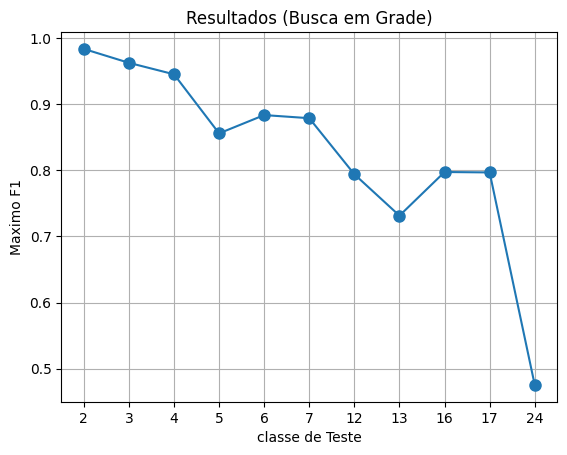

In [10]:
results_grid = [df["target"][idx : idx + 5].max() for idx in range(0, df.shape[0], 120)]

plt.plot(x_label, results_grid, marker="o", linestyle="-", markersize=8)
plt.xlabel("classe de Teste")
plt.ylabel("Maximo F1")
plt.title("Resultados (Busca em Grade)")
plt.grid(True)
plt.show()

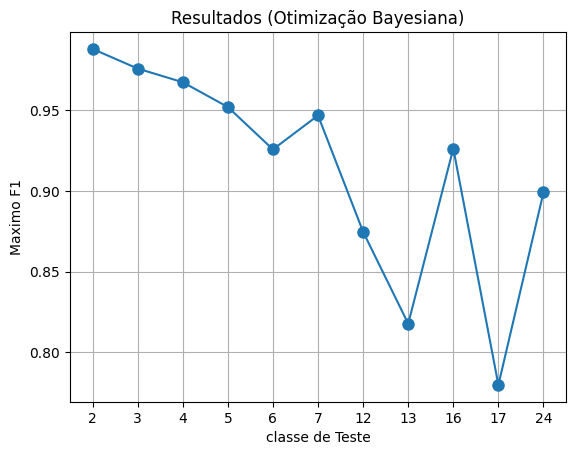

In [65]:
results = [df["target"][:30].max()]

for idx in range(30, 80, 5):
    results.append(df["target"][idx : idx + 5].max())

plt.plot(x_label, results, marker="o", linestyle="-", markersize=8)
plt.xlabel("classe de Teste")
plt.ylabel("Maximo F1")
plt.title("Resultados (Otimização Bayesiana)")
plt.grid(True)
plt.show()